In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

In [2]:
# Loading the file
df = pd.read_csv("Customers.csv",sep=";",decimal=',')

In [3]:
# Dropping the CustomerID column because it's irrelevant here
df = df.drop('CustomerId', axis = 1)

In [4]:
df.shape

(1511, 5)

In [5]:
# Average, mean, smallest, greatest value
valsdf = pd.concat([df.mean(axis=0),df.median(axis=0),df.min(axis=0),df.max(axis=0),df.quantile(q=0.25,axis=0),df.quantile(q=0.75,axis=0)],axis=1)
valsdf

,0.00,1.00,2.00,3.00,0.25,0.75
Profit,1102.391132,224.00,1.00,105993.00,79.00,559.5
Recency,15.847121,6.00,1.00,91.00,4.00,19.0
Frequency,10.710126,9.00,1.00,79.00,3.00,14.5
Monetary,175380.500979,5799.93,7.29,32539936.23,1392.95,22289.0
Variance,16.673064,11.00,1.00,139.00,5.00,23.0


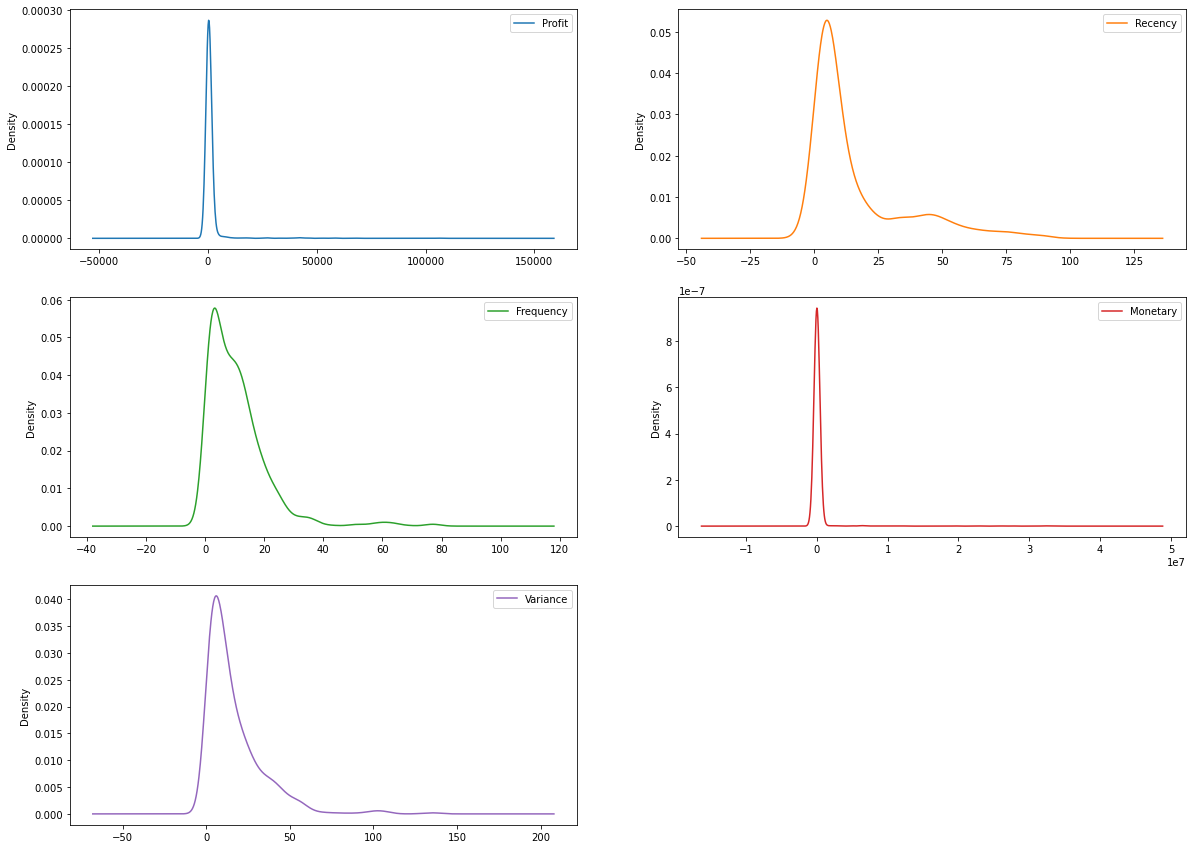

In [6]:
df.plot(kind= 'kde' , subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(20,15))
plt.show()

In [7]:
# No null or 0 values
print(df.isnull().sum())
print(df.astype(bool).sum(axis=0))

Profit       0
Recency      0
Frequency    0
Monetary     0
Variance     0
dtype: int64
Profit       1511
Recency      1511
Frequency    1511
Monetary     1511
Variance     1511
dtype: int64


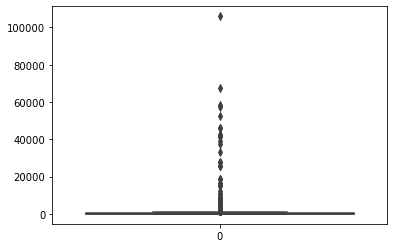

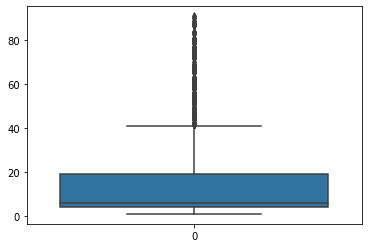

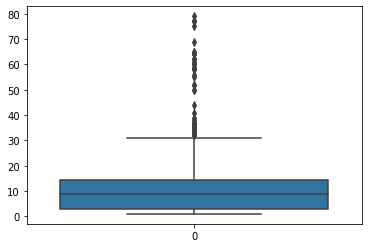

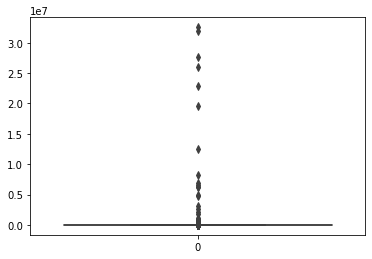

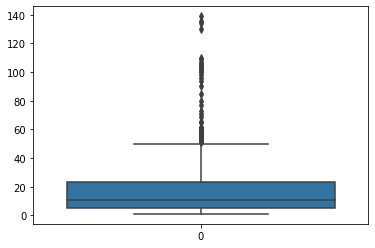

In [8]:
# Boxplots analysis
for columnname in df.columns:
    sns.boxplot(data=df[columnname])
    plt.show()
# A lot of outliers

In [9]:
# No null or 0 values
print(df.isnull().sum())
print(df.astype(bool).sum(axis=0))

Profit       0
Recency      0
Frequency    0
Monetary     0
Variance     0
dtype: int64
Profit       1511
Recency      1511
Frequency    1511
Monetary     1511
Variance     1511
dtype: int64


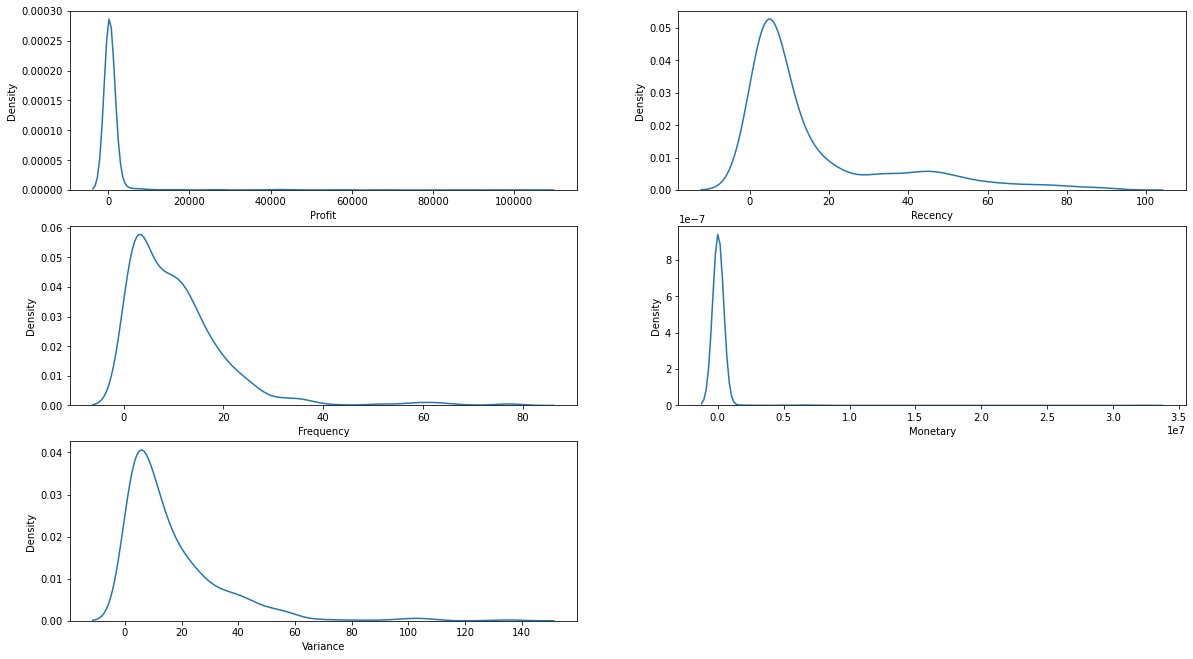

In [10]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)     
plt.show()

In [11]:
# #PROFIT
Range='PROFIT_RANGE'
df[Range]=0        
df.loc[((df['Profit']>0)&(df['Profit']<=200)),Range]=1
df.loc[((df['Profit']>200)&(df['Profit']<=1000)),Range]=2
df.loc[((df['Profit']>1000)&(df['Profit']<=5000)),Range]=3
df.loc[((df['Profit']>5000)&(df['Profit']<=25000)),Range]=4
df.loc[((df['Profit']>25000)&(df['Profit']<=75000)),Range]=5
df.loc[((df['Profit']>75000)),Range]=6
    
#MONETARY
Range='MONETARY_RANGE'
df[Range]=0        
df.loc[((df['Monetary']>0)&(df['Monetary']<=1000)),Range]=1
df.loc[((df['Monetary']>1000)&(df['Monetary']<=2000)),Range]=2
df.loc[((df['Monetary']>2000)&(df['Monetary']<=5000)),Range]=3
df.loc[((df['Monetary']>5000)&(df['Monetary']<=10000)),Range]=4
df.loc[((df['Monetary']>20000)&(df['Monetary']<=40000)),Range]=5
df.loc[((df['Monetary']>40000)),Range]=6

#RECENCY
Range='RECENCY_RANGE'
df[Range]=0        
df.loc[((df['Recency']>0)&(df['Recency']<=10)),Range]=1
df.loc[((df['Recency']>10)&(df['Recency']<=20)),Range]=2
df.loc[((df['Recency']>20)&(df['Recency']<=40)),Range]=3
df.loc[((df['Recency']>40)&(df['Recency']<=60)),Range]=4
df.loc[((df['Recency']>60)&(df['Recency']<=80)),Range]=5
df.loc[((df['Recency']>80)),Range]=6

#FREQUENCY
Range='FREQUENCY_RANGE'
df[Range]=0        
df.loc[((df['Frequency']>0)&(df['Frequency']<=10)),Range]=1
df.loc[((df['Frequency']>10)&(df['Frequency']<=20)),Range]=2
df.loc[((df['Frequency']>20)&(df['Frequency']<=40)),Range]=3
df.loc[((df['Frequency']>40)&(df['Frequency']<=60)),Range]=4
df.loc[((df['Frequency']>60)&(df['Frequency']<=80)),Range]=5
df.loc[((df['Frequency']>80)),Range]=6

#VARIANCE
Range='VARIANCE_RANGE'
df[Range]=0        
df.loc[((df['Variance']>0)&(df['Variance']<=10)),Range]=1
df.loc[((df['Variance']>10)&(df['Variance']<=30)),Range]=2
df.loc[((df['Variance']>30)&(df['Variance']<=60)),Range]=3
df.loc[((df['Variance']>60)&(df['Variance']<=100)),Range]=4
df.loc[((df['Variance']>100)&(df['Variance']<=120)),Range]=5
df.loc[((df['Variance']>120)),Range]=6

In [12]:
df.drop(['Profit','Monetary','Variance','Frequency','Recency'],axis=1, inplace=True)

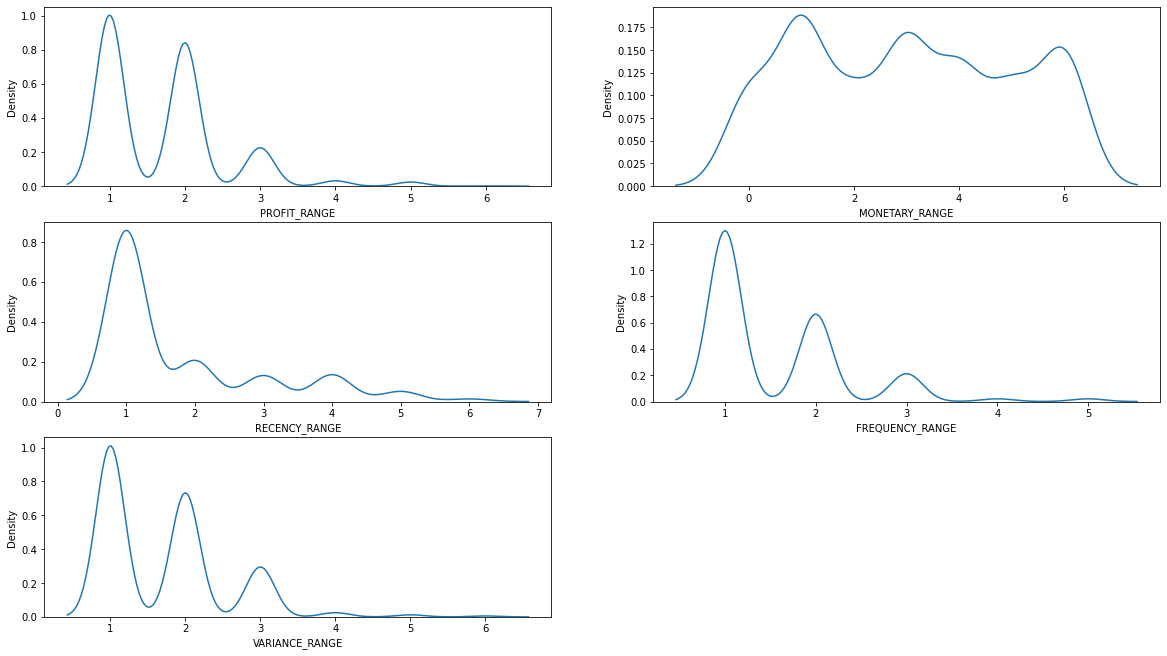

In [13]:
# KDE plots for the categorized values
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)     
plt.show()

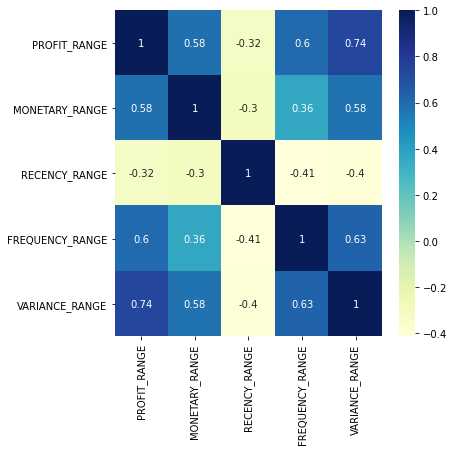

In [14]:
# Heat map for correlation
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")
plt.show()

In [15]:
scale = StandardScaler()
X = scale.fit_transform(df)
X.shape

(1511, 5)

In [16]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

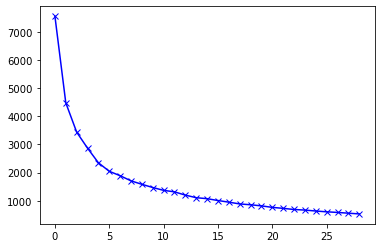

In [17]:
plt.plot(cost, 'bx-')

In [18]:
kmean= KMeans(5)
kmean.fit(X)
labels=kmean.labels_

In [19]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,PROFIT_RANGE,MONETARY_RANGE,RECENCY_RANGE,FREQUENCY_RANGE,VARIANCE_RANGE,cluster
0,1,3,5,1,1,2
1,1,1,1,1,1,0
2,1,1,3,1,1,2
3,2,3,1,1,1,0
4,2,6,1,3,2,3


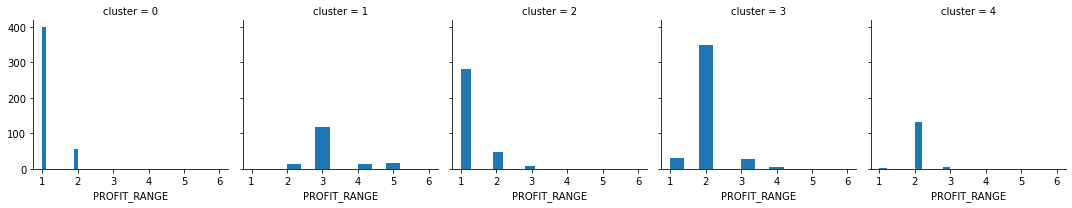

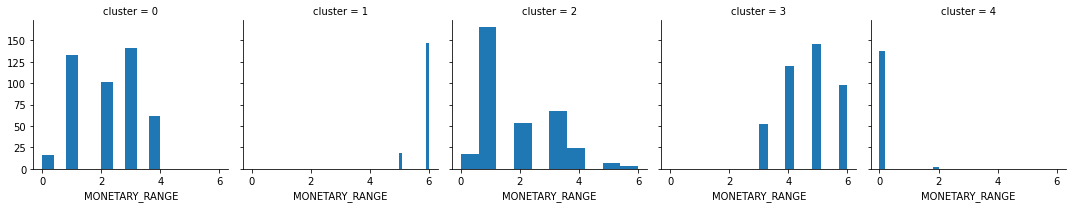

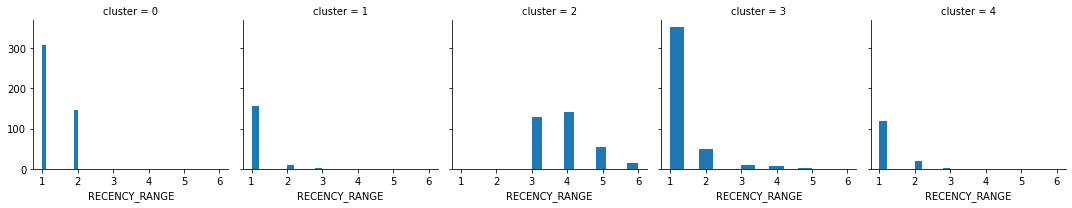

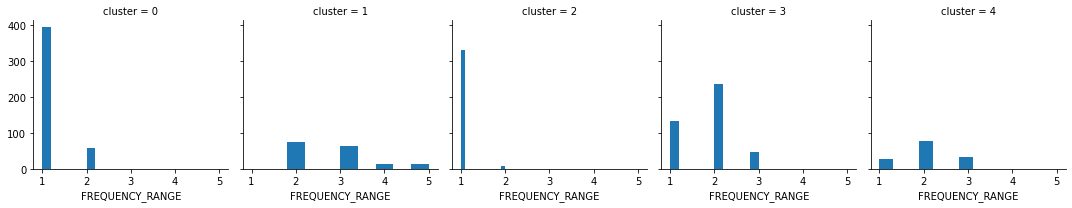

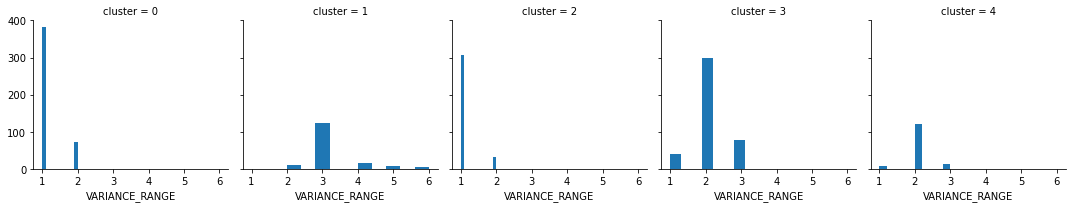

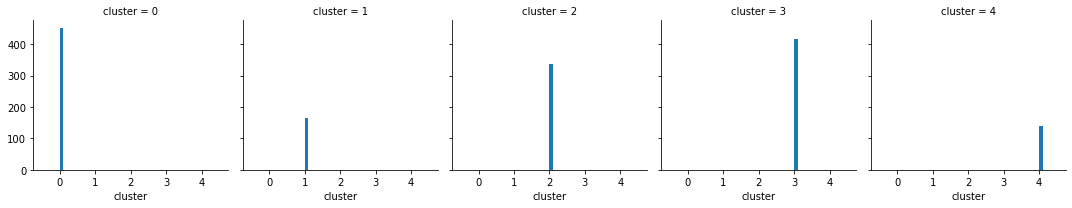

In [20]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [21]:
######################################################## FOR 5 CLUSTERS ########################################################


#Cluster 0
#PROFIT 2
#MONETARY 1
#RECENCY 1-2
#FREQUENCY 1-3
#VARIANCE 2
#AVERAGE PROFIT
#LOWEST MONETARY
#LOW RECENCY => RECENT TRANSACTIONS
#AVERAGE FREQUENCY
#AVERAGE VARIANCE

#CONCLUSION: NEW CUSTOMERS


#Cluster 1
#PROFIT 5-6
#MONETARY 1-4
#RECENCY 1
#FREQUENCY 2-5
#VARIANCE 3-6
#VERY HIGH PROFIT => PROFITABLE CUSTOMER
#DIVERSE MONETARY => CUSTOMERS HAVE BEEN BUYING PRODUCTS FOR A LONG PERIOD OF TIME
#LOW RECENCY => RECENT TRANSACTIONS
#DIVERSE FREQUENCY => LESS REGULAR PURCHASES
#DIVERSE VARIANCE => DIVERSE PRODUCTS

#CONCLUSION: REGULAR PROFITABLE CUSTOMERS


#Cluster 2
#PROFIT 1-2
#MONETARY 1-4
#RECENCY 3-6
#FREQUENCY 1
#VARIANCE 1-2
#LOW PROFIT
#DIVERSE MONETARY => CUSTOMERS HAVE BEEN BUYING PRODUCTS FOR A LONG PERIOD OF TIME
#DIVERSE RECENCY => RECENT TRANSACTIONS (3-6)
#LOW FREQUENCY => REGULAR PURCHASES
#LOW VARIANCE

#CONCLUSION: NON-ACTIVE CUSTOMERS


#Cluster 3
#PROFIT 1-2
#MONETARY 1-4
#RECENCY 1-2
#FREQUENCY 2
#VARIANCE 1-2
#LOW PROFIT
#DIVERSE POZIOM MONETARY => CUSTOMERS HAVE BEEN BUYING PRODUCTS FOR A LONG PERIOD OF TIME
#LOW RECENCY => RECENT TRANSACTIONS
#LOW FREQUENCY => RATHER REGULAR TRANSACTIONS
#LOW VARIANCE

#CONCLUSION: REGULAR CUSTOMERS


#Cluster 4
#PROFIT 2-3 => CUSTOMERS DO NOT BRING MUCH PROFIT
#MONETARY 3-6 => CUSTOMERS HAVE BEEN BUYING FOR A LONG TIME
#RECENCY 1-4 => SOME CLIENT HAVEN'T BOUGHT RECENTLY
#FREQUENCY 1-3 => CUSTOMERS BOUGHT PRODUCTS REGULARLY
#VARIANCE 1-3
#LOW PROFIT
#HIGH MONETARY
#DIVERSE RECENCY => RECENT TRANSACTIONS
#DIVERSE FREQUENCY
#DIVERSE VARIANCE

#CONCLUSION: LEAVING CUSTOMERS

In [22]:
# Decreasing number of dimentions to 2 in order to plot
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(1511, 2)

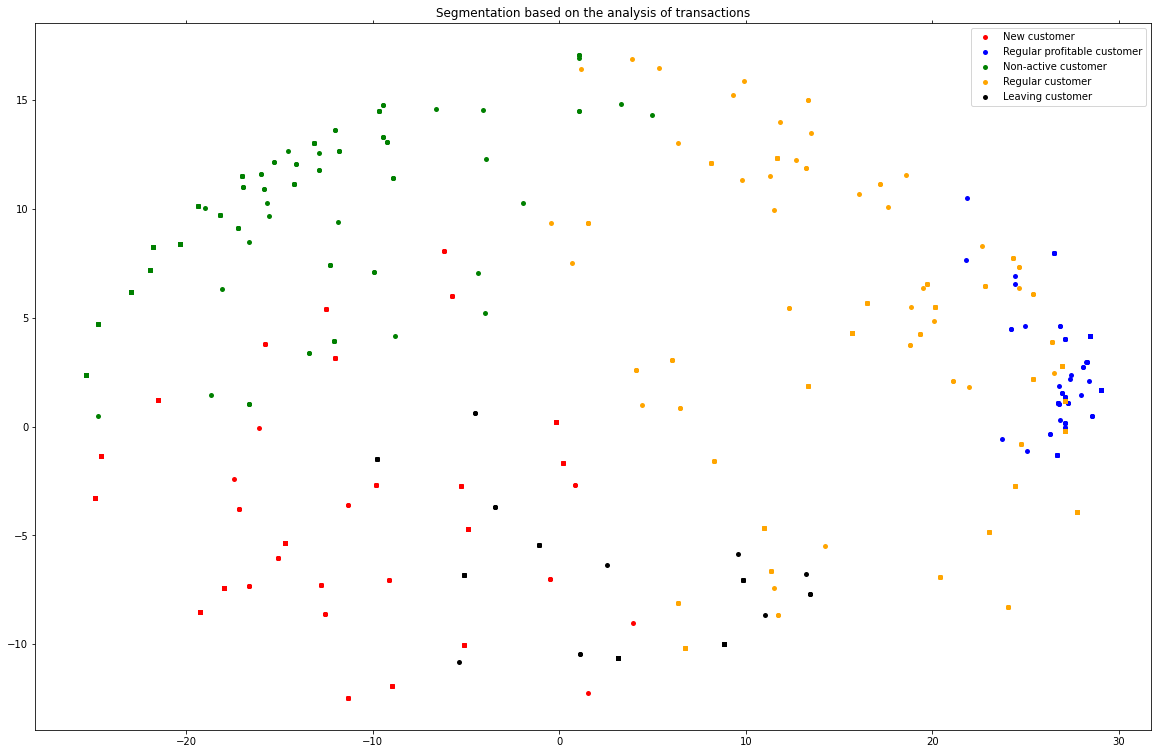

In [23]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'orange', 
          4: 'black'}

names = {0: 'New customer', 
         1: 'Regular profitable customer', 
         2: 'Non-active customer', 
         3: 'Regular customer', 
         4: 'Leaving customer'}

dff = pd.DataFrame({'x': x, 'y':y, 'label':labels})
groups = dff.groupby('label')


# Plot
fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Segmentation based on the analysis of transactions")
plt.show()

In [24]:
# Many observations overlap but the clusters themselves are separate,
# though leaving and non-active customers tend to overlap

In [25]:
# Reloading data
df = pd.read_csv("Customers.csv",sep=";",decimal=',')

In [26]:
df['SegmentId'] = labels

In [27]:
segmentnames = np.vectorize(names.get)(labels)

In [28]:
df['SegmentName'] = segmentnames

In [29]:
df.to_csv('output.csv', sep=';',encoding='utf-8-sig',index=False)